In [137]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.head()

,Date,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH,AQI
0,10/04/2015,14.93,79.48,10.17,83.02,482.61,30.16,263.99,1.50,31.26,475.049130,396.315696,326.702405,265.960000,233.431034,5,10,100,4,417.901739
1,11/04/2015,11.17,77.10,13.88,114.30,442.78,29.81,256.34,1.26,36.18,417.901739,475.049130,396.315696,326.702405,265.960000,6,11,101,4,746.352174
2,12/04/2015,28.10,85.62,13.12,251.78,671.70,29.92,160.78,0.97,36.42,746.352174,417.901739,475.049130,396.315696,326.702405,7,12,102,4,141.397315
3,13/04/2015,22.88,61.65,10.91,64.32,161.80,24.30,151.32,1.77,53.08,141.397315,746.352174,417.901739,475.049130,396.315696,1,13,103,4,267.807931
4,14/04/2015,14.95,53.87,15.89,110.57,247.32,24.91,118.04,2.01,58.09,267.807931,141.397315,746.352174,417.901739,475.049130,2,14,104,4,352.743165


In [138]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['AQI'])
train_X = train_df.drop(columns=['Date'])
test_X = test_df.drop(columns=['AQI'])
test_X = test_df.drop(columns=['Date'])

#check that the target variable has been removed
train_X.head()
test_X.head()

,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH,AQI
0,31.89,115.24,96.386071,443.00,631.59,20.30,204.18,0.33,48.80,872.421837,688.028261,782.881739,830.700408,390.826835,5,20,201,7,788.918367
1,17.25,132.90,16.471314,376.34,557.94,21.55,225.31,0.32,50.03,788.918367,872.421837,688.028261,782.881739,830.700408,6,21,202,7,654.237959
2,22.15,112.26,90.652809,345.80,278.91,21.24,149.87,0.50,54.24,654.237959,788.918367,872.421837,688.028261,782.881739,7,22,203,7,592.534694
3,22.43,101.09,47.606205,358.78,227.17,22.58,173.18,0.42,52.34,592.534694,654.237959,788.918367,872.421837,688.028261,1,23,204,7,618.759592
4,19.34,113.46,56.914764,333.71,290.95,22.57,125.78,0.52,56.97,618.759592,592.534694,654.237959,788.918367,872.421837,2,24,205,7,568.107959


In [139]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]



#view dataframe
train_y.tail()

,AQI
1205,486.699565
1206,496.743043
1207,782.881739
1208,688.028261
1209,614.423913


In [140]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [141]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [142]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1210/1210 [==============================] - 0s 348us/step - loss: 404453.9721
Epoch 2/300
1210/1210 [==============================] - 0s 34us/step - loss: 196303.4282
Epoch 3/300
1210/1210 [==============================] - 0s 39us/step - loss: 112923.7534
Epoch 4/300
1210/1210 [==============================] - 0s 38us/step - loss: 42353.0682
Epoch 5/300
1210/1210 [==============================] - 0s 44us/step - loss: 24091.4600
Epoch 6/300
1210/1210 [==============================] - 0s 34us/step - loss: 19529.2830
Epoch 7/300
1210/1210 [==============================] - 0s 37us/step - loss: 15666.3383
Epoch 8/300
1210/1210 [==============================] - 0s 38us/step - loss: 13901.8315
Epoch 9/300
1210/1210 [==============================] - 0s 31us/step - loss: 12959.8471
Epoch 10/300
1210/1210 [==============================] - 0s 39us/step - loss: 12194.2764
Epoch 11/300
1210/1210 [==============================] - 0s 41us/step - loss: 11506.4317
Epoch 12/300
12

1210/1210 [==============================] - 0s 31us/step - loss: 12.5425
Epoch 95/300
1210/1210 [==============================] - 0s 27us/step - loss: 11.9729
Epoch 96/300
1210/1210 [==============================] - 0s 37us/step - loss: 11.2599
Epoch 97/300
1210/1210 [==============================] - 0s 29us/step - loss: 10.8664
Epoch 98/300
1210/1210 [==============================] - 0s 30us/step - loss: 10.9745
Epoch 99/300
1210/1210 [==============================] - 0s 34us/step - loss: 10.5631
Epoch 100/300
1210/1210 [==============================] - 0s 33us/step - loss: 10.8766
Epoch 101/300
1210/1210 [==============================] - 0s 35us/step - loss: 9.9725
Epoch 102/300
1210/1210 [==============================] - 0s 34us/step - loss: 9.3458
Epoch 103/300
1210/1210 [==============================] - 0s 32us/step - loss: 8.8275
Epoch 104/300
1210/1210 [==============================] - 0s 35us/step - loss: 8.8267
Epoch 105/300
1210/1210 [==============================

1210/1210 [==============================] - 0s 33us/step - loss: 0.5937
Epoch 189/300
1210/1210 [==============================] - 0s 47us/step - loss: 0.6070
Epoch 190/300
1210/1210 [==============================] - 0s 41us/step - loss: 0.8444
Epoch 191/300
1210/1210 [==============================] - 0s 47us/step - loss: 0.6752
Epoch 192/300
1210/1210 [==============================] - 0s 56us/step - loss: 0.5659
Epoch 193/300
1210/1210 [==============================] - 0s 38us/step - loss: 0.5118
Epoch 194/300
1210/1210 [==============================] - 0s 39us/step - loss: 0.6037
Epoch 195/300
1210/1210 [==============================] - 0s 35us/step - loss: 0.4544
Epoch 196/300
1210/1210 [==============================] - 0s 36us/step - loss: 0.4454
Epoch 197/300
1210/1210 [==============================] - 0s 36us/step - loss: 0.4039
Epoch 198/300
1210/1210 [==============================] - 0s 32us/step - loss: 0.8317
Epoch 199/300
1210/1210 [==============================] 

1210/1210 [==============================] - 0s 57us/step - loss: 0.0084
Epoch 283/300
1210/1210 [==============================] - 0s 46us/step - loss: 0.0105
Epoch 284/300
1210/1210 [==============================] - 0s 42us/step - loss: 0.0358
Epoch 285/300
1210/1210 [==============================] - 0s 49us/step - loss: 0.2927
Epoch 286/300
1210/1210 [==============================] - 0s 38us/step - loss: 4.3855
Epoch 287/300
1210/1210 [==============================] - 0s 34us/step - loss: 6.5886
Epoch 288/300
1210/1210 [==============================] - 0s 39us/step - loss: 0.3379
Epoch 289/300
1210/1210 [==============================] - 0s 41us/step - loss: 0.1299
Epoch 290/300
1210/1210 [==============================] - 0s 34us/step - loss: 0.0346
Epoch 291/300
1210/1210 [==============================] - 0s 35us/step - loss: 0.0229
Epoch 292/300
1210/1210 [==============================] - 0s 33us/step - loss: 0.0329
Epoch 293/300
1210/1210 [==============================] 

In [143]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(test_X)

In [144]:
l = []
for i in range(13):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [788.9122] [0.00078913]
654.2379591836731 [654.233] [0.00076499]
592.5346938775509 [592.5478] [-0.00221465]
618.759591836735 [618.7747] [-0.0024463]
568.1079591836731 [568.12317] [-0.00267515]
384.360506329114 [384.36752] [-0.00182616]
399.310759493671 [399.18954] [0.03035626]
316.893720930233 [316.9042] [-0.0033128]
486.69956521739095 [483.94562] [0.5658392]
496.74304347826103 [496.72708] [0.00321307]
782.881739130435 [776.2863] [0.8424514]
688.028260869565 [688.0203] [0.00115323]
614.423913043478 [614.41504] [0.00144039]


In [145]:
l.sort(reverse = True) 
print(l)

[array([0.8424514], dtype=float32), array([0.5658392], dtype=float32), array([0.03035626], dtype=float32), array([0.00321307], dtype=float32), array([0.00144039], dtype=float32), array([0.00115323], dtype=float32), array([0.00078913], dtype=float32), array([0.00076499], dtype=float32), array([-0.00182616], dtype=float32), array([-0.00221465], dtype=float32), array([-0.0024463], dtype=float32), array([-0.00267515], dtype=float32), array([-0.0033128], dtype=float32)]


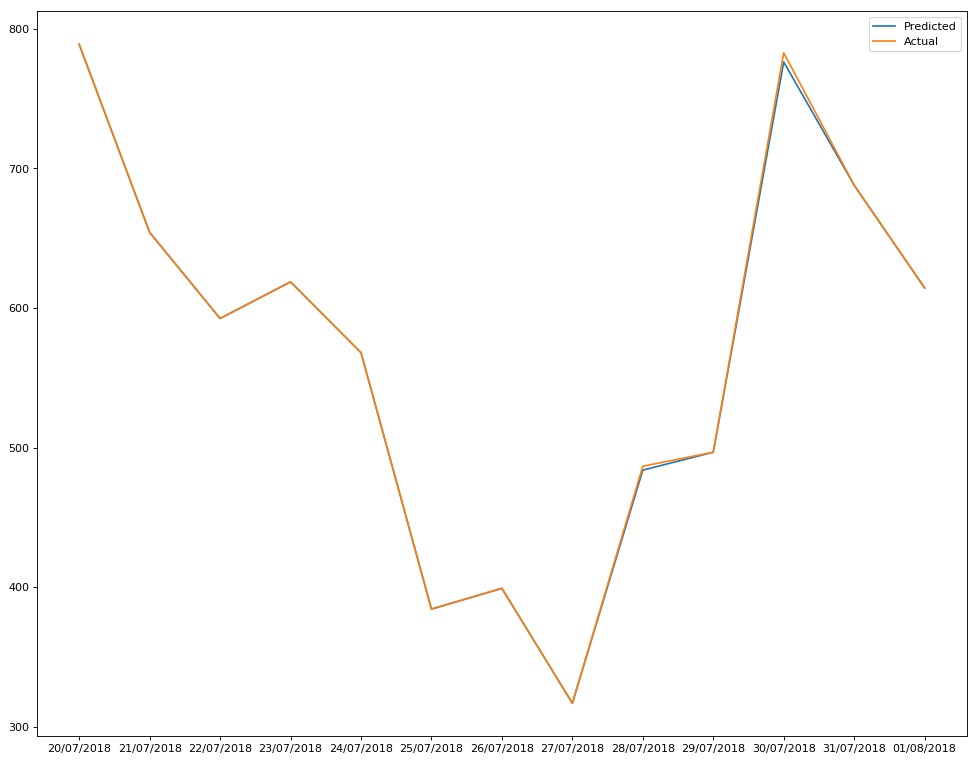

In [150]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(13):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [151]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1210/1210 [==============================] - 1s 419us/step - loss: 42085.0624
Epoch 2/300
1210/1210 [==============================] - 0s 60us/step - loss: 1621.2213
Epoch 3/300
1210/1210 [==============================] - 0s 63us/step - loss: 195.8210
Epoch 4/300
1210/1210 [==============================] - 0s 69us/step - loss: 98.3249
Epoch 5/300
1210/1210 [==============================] - 0s 63us/step - loss: 66.6505
Epoch 6/300
1210/1210 [==============================] - 0s 70us/step - loss: 54.5055
Epoch 7/300
1210/1210 [==============================] - 0s 71us/step - loss: 36.7180
Epoch 8/300
1210/1210 [==============================] - 0s 66us/step - loss: 28.7308
Epoch 9/300
1210/1210 [==============================] - 0s 70us/step - loss: 24.4255
Epoch 10/300
1210/1210 [==============================] - 0s 69us/step - loss: 24.6354
Epoch 11/300
1210/1210 [==============================] - 0s 66us/step - loss: 30.1915
Epoch 12/300
1210/1210 [=====================

1210/1210 [==============================] - 0s 88us/step - loss: 23.6585
Epoch 96/300
1210/1210 [==============================] - 0s 61us/step - loss: 10.5179
Epoch 97/300
1210/1210 [==============================] - 0s 64us/step - loss: 11.5154
Epoch 98/300
1210/1210 [==============================] - 0s 59us/step - loss: 7.8241
Epoch 99/300
1210/1210 [==============================] - 0s 56us/step - loss: 8.4632
Epoch 100/300
1210/1210 [==============================] - 0s 61us/step - loss: 4.8683
Epoch 101/300
1210/1210 [==============================] - 0s 61us/step - loss: 4.3196
Epoch 102/300
1210/1210 [==============================] - 0s 63us/step - loss: 5.8087
Epoch 103/300
1210/1210 [==============================] - 0s 62us/step - loss: 5.7571
Epoch 104/300
1210/1210 [==============================] - 0s 65us/step - loss: 13.7549
Epoch 105/300
1210/1210 [==============================] - 0s 60us/step - loss: 17.4549
Epoch 106/300
1210/1210 [==============================]

1210/1210 [==============================] - 0s 82us/step - loss: 13.9671
Epoch 189/300
1210/1210 [==============================] - 0s 74us/step - loss: 5.7655
Epoch 190/300
1210/1210 [==============================] - 0s 76us/step - loss: 2.5453
Epoch 191/300
1210/1210 [==============================] - 0s 64us/step - loss: 7.7061
Epoch 192/300
1210/1210 [==============================] - 0s 61us/step - loss: 6.6446
Epoch 193/300
1210/1210 [==============================] - 0s 62us/step - loss: 4.0114
Epoch 194/300
1210/1210 [==============================] - 0s 78us/step - loss: 3.0074
Epoch 195/300
1210/1210 [==============================] - 0s 71us/step - loss: 2.3457
Epoch 196/300
1210/1210 [==============================] - 0s 86us/step - loss: 2.4740
Epoch 197/300
1210/1210 [==============================] - 0s 72us/step - loss: 15.4542
Epoch 198/300
1210/1210 [==============================] - 0s 64us/step - loss: 71.6235
Epoch 199/300
1210/1210 [=============================

1210/1210 [==============================] - 0s 69us/step - loss: 1.7551
Epoch 282/300
1210/1210 [==============================] - 0s 63us/step - loss: 1.6844
Epoch 283/300
1210/1210 [==============================] - 0s 60us/step - loss: 1.2297
Epoch 284/300
1210/1210 [==============================] - 0s 63us/step - loss: 0.8499
Epoch 285/300
1210/1210 [==============================] - 0s 75us/step - loss: 1.8661
Epoch 286/300
1210/1210 [==============================] - 0s 85us/step - loss: 1.4150
Epoch 287/300
1210/1210 [==============================] - 0s 87us/step - loss: 1.1915
Epoch 288/300
1210/1210 [==============================] - 0s 67us/step - loss: 0.6502
Epoch 289/300
1210/1210 [==============================] - 0s 65us/step - loss: 4.3808
Epoch 290/300
1210/1210 [==============================] - 0s 57us/step - loss: 2.0640
Epoch 291/300
1210/1210 [==============================] - 0s 68us/step - loss: 1.0144
Epoch 292/300
1210/1210 [==============================] 

In [152]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model_mc.predict(test_X)

In [153]:
l = []
for i in range(13):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [780.67346] [1.0450934]
654.2379591836731 [645.2615] [1.3720545]
592.5346938775509 [581.802] [1.8113143]
618.759591836735 [611.0846] [1.2403829]
568.1079591836731 [559.84265] [1.4548854]
384.360506329114 [379.23184] [1.3343364]
399.310759493671 [395.0132] [1.076241]
316.893720930233 [313.45895] [1.0838819]
486.69956521739095 [482.27292] [0.9095212]
496.74304347826103 [491.81082] [0.9929119]
782.881739130435 [776.0548] [0.87202245]
688.028260869565 [680.3513] [1.1157886]
614.423913043478 [605.62976] [1.4312804]


In [154]:
l.sort(reverse = True) 
print(l)

[array([1.8113143], dtype=float32), array([1.4548854], dtype=float32), array([1.4312804], dtype=float32), array([1.3720545], dtype=float32), array([1.3343364], dtype=float32), array([1.2403829], dtype=float32), array([1.1157886], dtype=float32), array([1.0838819], dtype=float32), array([1.076241], dtype=float32), array([1.0450934], dtype=float32), array([0.9929119], dtype=float32), array([0.9095212], dtype=float32), array([0.87202245], dtype=float32)]


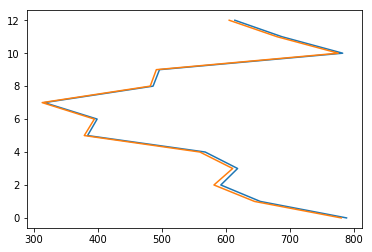

In [155]:
import matplotlib.pyplot as plt
import numpy as np
datelist = []
predictionlist = []
actuallist = []
for i in range(13):
    datelist.append(i)
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
x = np.arange(10)

plt.plot(actuallist, datelist)
plt.plot(predictionlist, datelist)
plt.show()